# Analysis of Warshall vs Naive Algorithm - Transitive Closure

In [1]:
#Required Libraries Import

import numpy as np
import time
import matplotlib.pyplot as plt
import math
from datetime import datetime

### Warshall Algorithm to compute transitive closure

In [2]:
def warshallAlgorithm(adjMtrx, order):    
    adjMatrix = adjMtrx
    for k in range(order):
        for i in range(order):
            for j in range(order):
                adjMatrix[i][j] = adjMatrix[i][j] or (adjMatrix[i][k] and adjMatrix[k][j])
    
    return adjMatrix

### Naive Algorithm to compute transitive closure

In [3]:
def naiveAlgorithm(adjMtrx, order):
    adjMatrixK = adjMtrx.copy()
    adjMatrixTC = adjMtrx.copy()
    for k in range(1, order):
        adjMatrixKTmp = np.zeros([order, order], dtype=int)
        for i in range(order):
            for j in range(order):                
                for l in range(order):
                    adjMatrixKTmp[i][j] = adjMatrixKTmp[i][j] or (adjMatrixK[i][l] and adjMtrx[l][j])
                adjMatrixTC[i][j] = adjMatrixTC[i][j] or adjMatrixKTmp[i][j]
        adjMatrixK = adjMatrixKTmp.copy()
                
    return adjMatrixTC

### Evaluation of Both Algorithm using random matrices of order 10 to 100

In [4]:
timeNaive, timeWarshall = [], []
for i in range(10, 101):
    adjMatrix = np.random.choice([0,1], [i, i])
        
    start = time.perf_counter()
    x1 = naiveAlgorithm(adjMatrix, i)
    timeNaive.append(time.perf_counter() - start)

    start = time.perf_counter()
    x2 = warshallAlgorithm(adjMatrix, i)
    timeWarshall.append(time.perf_counter() - start)
    
    print("Order of Matrix : " + str(i))

Order of Matrix : 10
Order of Matrix : 11
Order of Matrix : 12
Order of Matrix : 13
Order of Matrix : 14
Order of Matrix : 15
Order of Matrix : 16
Order of Matrix : 17
Order of Matrix : 18
Order of Matrix : 19
Order of Matrix : 20
Order of Matrix : 21
Order of Matrix : 22
Order of Matrix : 23
Order of Matrix : 24
Order of Matrix : 25
Order of Matrix : 26
Order of Matrix : 27
Order of Matrix : 28
Order of Matrix : 29
Order of Matrix : 30
Order of Matrix : 31
Order of Matrix : 32
Order of Matrix : 33
Order of Matrix : 34
Order of Matrix : 35
Order of Matrix : 36
Order of Matrix : 37
Order of Matrix : 38
Order of Matrix : 39
Order of Matrix : 40
Order of Matrix : 41
Order of Matrix : 42
Order of Matrix : 43
Order of Matrix : 44
Order of Matrix : 45
Order of Matrix : 46
Order of Matrix : 47
Order of Matrix : 48
Order of Matrix : 49
Order of Matrix : 50
Order of Matrix : 51
Order of Matrix : 52
Order of Matrix : 53
Order of Matrix : 54
Order of Matrix : 55
Order of Matrix : 56
Order of Matr

#### Loglog plot

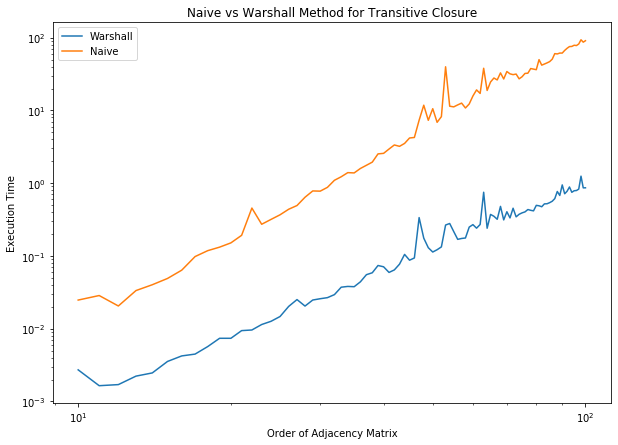

In [9]:
plt.figure(figsize=(10,7))
plt.title("Naive vs Warshall Method for Transitive Closure")
plt.loglog(np.arange(10, 101), timeWarshall, label = "Warshall")
plt.loglog(np.arange(10, 101), timeNaive, label = "Naive")
plt.xlabel("Order of Adjacency Matrix")
plt.ylabel("Execution Time")
plt.legend()
plt.show()

#### Order of both Algo

In [8]:
x=[math.log10(i) for i in range(10, 101)]

y=[math.log10(i) for i in timeNaive]

fit=np.polyfit(x,y,1)

print("Naive Algo slope= {} and intercept= {}".format(fit[0],fit[1]))

y2=[math.log10(i) for i in timeWarshall]

fitWarshall=np.polyfit(x,y2,1)

print("Warshall Algo slope= {} and intercept= {}".format(fitWarshall[0],fitWarshall[1]))

Naive Algo slope= 3.932783226525824 and intercept= -5.841500105975826
Warshall Algo slope= 2.957201447069561 and intercept= -5.9050369677100365
